<a href="https://colab.research.google.com/github/blinov-89/RBK_model/blob/main/Score_%3D_0_601178_RBK_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost
from xgboost import XGBRegressor

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer

from lightgbm import LGBMClassifier

from imblearn.combine import SMOTETomek

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Выполним загрузу датсета

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Всероссийский ИИ/РБК/train_dataset_train (1).csv", index_col= 0)
df_test = pd.read_csv("/content/drive/MyDrive/Всероссийский ИИ/РБК/test_dataset_test (2).csv", index_col= 0)

In [ ]:
df_train.head(3)

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent
document_id,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,[],1.580,5409f11ce063da9c8b588a18,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,"['54244e01cbb20f03076b236d','5878a2ec9a7947e53...",1.853,5409f11ce063da9c8b588a12,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,[],0.000,5409f11ce063da9c8b588a12,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424


## Проанализируем датасет

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   object 
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   object 
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 601.6+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw to 6236f9129a79477b0ef18ae0ewByZQ1FQBK2dpXyY77rYw
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3000 non-null   object 
 1   publish_date  3000 non-null   object 
 2   session       3000 non-null   object 
 3   authors       3000 non-null   object 
 4   ctr           3000 non-null   float64
 5   category      3000 non-null   object 
 6   tags          3000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 187.5+ KB


Заменим категорию и автора на число

In [ ]:
df_train["category"] = df_train["category"].astype('category')
df_train["category"] = df_train["category"].cat.codes
df_train["category"] = df_train["category"].astype('int')

In [ ]:
df_train["authors"] = df_train["authors"].astype('category')
df_train["authors"] = df_train["authors"].cat.codes
df_train["authors"] = df_train["authors"].astype('int')

In [ ]:
df_train['day'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%d").astype(int)
df_train['mounth'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%m").astype(int)

In [ ]:
df_train['day_week'] = pd.to_datetime(df_train['publish_date']).dt.strftime("%w").astype(int)

In [ ]:
df_train['day_week'].unique()

array([1, 5, 6, 2, 3, 4, 0])

In [ ]:
df_train['title'].str.count(' ') + 1

document_id
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ    10
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw     8
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA    86
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w    86
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg    86
                                                  ..
61fd479c9a7947848183694751RC_1i5QlGuv7B2FzwTjw     9
628a8f1c9a79478c64a7dae450tIkSGVSf2O8XQgk_uaHQ    10
6244cf5e9a79479099346b26tKlqoxQYSmij0ZBrGzebug     7
627303699a794749b8116abc12JX_3ZDTDu2XHF3k2eJVg    86
627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow    11
Name: title, Length: 7000, dtype: int64

In [ ]:
df_train['count_sen'] = df_train['title'].str.count(' ') + 1

In [ ]:
len(df_train['count_sen'].unique())

42

In [ ]:
df_train["count_sen"] = df_train["count_sen"].astype('category')
df_train["count_sen"] = df_train["count_sen"].cat.codes
df_train["count_sen"] = df_train["count_sen"].astype('int')

In [ ]:
df_train['count_tags'] = df_train['tags'].str.count(' ') + 1

In [ ]:
df_train["count_tags"] = df_train["count_tags"].astype('category')
df_train["count_tags"] = df_train["count_tags"].cat.codes
df_train["count_tags"] = df_train["count_tags"].astype('int')

In [ ]:
len(df_train['count_tags'].unique())

11

In [ ]:
df_train['tags'][0]

"['55928d339a794751dc8303d6', '542d1e28cbb20f862ac2c1f6', '5409f140e063daa0f408ad1d', '55797e339a794789759c64a1']"

In [ ]:
len(df_train['tags'].unique())

6798

In [ ]:
len(df_train['title'].unique())

6954

In [ ]:
len(df_train['session'].unique())

5901

In [ ]:
df_train.head(3)

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,day,mounth,day_week,count_sen,count_tags
document_id,,,,,,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,560,1.580,2,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...",20460,1.134,35.850,4,4,1,8,3
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,38,1.853,0,"['549d25df9a794775979561d2', '58abcf539a7947f1...",19038,1.142,38.355,18,2,5,6,2
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,560,0.000,0,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...",51151,1.185,36.424,12,2,6,36,2


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ to 627f1c089a794743b070ff73hVvdVmFxS2SlZ2_lECDEow
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               7000 non-null   object 
 1   publish_date        7000 non-null   object 
 2   session             7000 non-null   object 
 3   authors             7000 non-null   int64  
 4   ctr                 7000 non-null   float64
 5   category            7000 non-null   int64  
 6   tags                7000 non-null   object 
 7   views               7000 non-null   int64  
 8   depth               7000 non-null   float64
 9   full_reads_percent  7000 non-null   float64
 10  day                 7000 non-null   int64  
 11  mounth              7000 non-null   int64  
 12  day_week            7000 non-null   int64  
 13  count_sen           7000 non-null   int64  
 14  count_tags          70

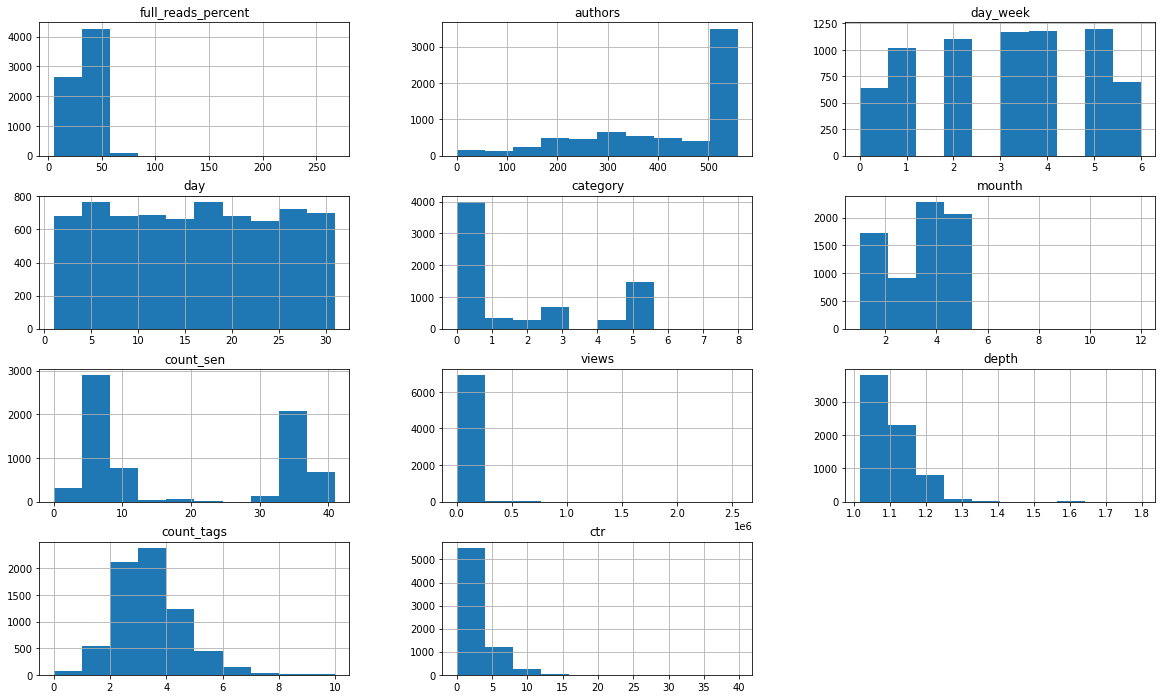

In [ ]:
features = list(set(df_train.columns) - set(['publish_date']))

_ = df_train[features].hist(figsize=(20,12))

Всего 9 категорий статей

In [ ]:
df_train.category.value_counts()

0    3988
5    1456
3     667
1     338
4     283
2     265
7       1
6       1
8       1
Name: category, dtype: int64

# модель views

In [ ]:
X = df_train.drop(["views","depth","full_reads_percent","title","publish_date", "session", "tags"], axis = 1)
y = df_train[["views"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=193)

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(verbosity=0)

Training score:  0.8781854390604038
Mean cross-validation score: 0.67
K-fold CV average score: 0.69
MSE: 6152822050.96
RMSE: 78439.93


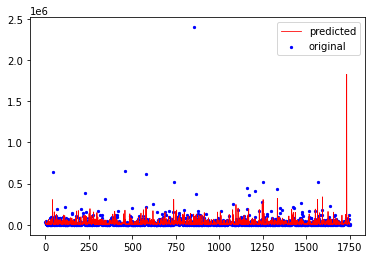

In [ ]:
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Загрузка теста и обработка

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Всероссийский ИИ/РБК/test_dataset_test (2).csv", index_col= 0)

In [ ]:
df_test.head(3)

,title,publish_date,session,authors,ctr,category,tags
document_id,,,,,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,«Крайне провокационная тема»: как Россия и США...,2022-02-01 17:02:44,J0AvX96vTAaQCiWVbzoMdw,[],0.000,5409f11ce063da9c8b588a12,"['58ca77679a794700b1e37f0a', '5409f1b7e063daa0..."
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,Власти Херсонской области пообещали сделать ру...,2022-05-24 00:50:55,QS5CqzXYRnmDdR2LaSreEw,[],1.598,5409f11ce063da9c8b588a12,"['5433603acbb20f6e5def0cc5', '5409f420e063daa0..."
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,Премьер и президент Финляндии призвали срочно ...,2022-05-12 07:11:51,XVsoyrUOT8OJJg2_finJhw,[],2.006,5409f11ce063da9c8b588a12,"['5409f270e063daa0f408b0a7', '5409f196e063daa0..."


In [ ]:
df_test["category"] = df_test["category"].astype('category')
df_test["category"] = df_test["category"].cat.codes
df_test["category"] = df_test["category"].astype('int')

In [ ]:
df_test["authors"] = df_test["authors"].astype('category')
df_test["authors"] = df_test["authors"].cat.codes
df_test["authors"] = df_test["authors"].astype('int')

In [ ]:
df_test['day'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%d").astype(int)
df_test['mounth'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%m").astype(int)

In [ ]:
df_test['day_week'] = pd.to_datetime(df_test['publish_date']).dt.strftime("%w").astype(int)

In [ ]:
df_test['day_week'].unique()

array([2, 4, 0, 1, 3, 5, 6])

In [ ]:
df_test['count_sen'] = df_test['title'].str.count(' ') + 1

In [ ]:
len(df_test['count_sen'].unique())

39

In [ ]:
df_test["count_sen"] = df_test["count_sen"].astype('category')
df_test["count_sen"] = df_test["count_sen"].cat.codes
df_test["count_sen"] = df_test["count_sen"].astype('int')

In [ ]:
df_test['count_tags'] = df_test['tags'].str.count(' ') + 1

In [ ]:
df_test["count_tags"] = df_test["count_tags"].astype('category')
df_test["count_tags"] = df_test["count_tags"].cat.codes
df_test["count_tags"] = df_test["count_tags"].astype('int')

In [ ]:
len(df_test['count_tags'].unique())

13

In [ ]:
df_test.head(3)

,title,publish_date,session,authors,ctr,category,tags,day,mounth,day_week,count_sen,count_tags
document_id,,,,,,,,,,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,«Крайне провокационная тема»: как Россия и США...,2022-02-01 17:02:44,J0AvX96vTAaQCiWVbzoMdw,325,0.000,0,"['58ca77679a794700b1e37f0a', '5409f1b7e063daa0...",1,2,2,34,4
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,Власти Херсонской области пообещали сделать ру...,2022-05-24 00:50:55,QS5CqzXYRnmDdR2LaSreEw,325,1.598,0,"['5433603acbb20f6e5def0cc5', '5409f420e063daa0...",24,5,2,5,3
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,Премьер и президент Финляндии призвали срочно ...,2022-05-12 07:11:51,XVsoyrUOT8OJJg2_finJhw,325,2.006,0,"['5409f270e063daa0f408b0a7', '5409f196e063daa0...",12,5,4,7,2


# Pred

In [ ]:
perd_test = df_test.drop(["title","publish_date", "session", "tags"], axis = 1)

In [ ]:
# perd_test = df_test[['authors'	,'ctr',	'category',	'day',	'mounth', 'day_week']]

In [ ]:
perd_test.head(3)

,authors,ctr,category,day,mounth,day_week,count_sen,count_tags
document_id,,,,,,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,325,0.000,0,1,2,2,34,4
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,325,1.598,0,24,5,2,5,3
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,325,2.006,0,12,5,4,7,2


In [ ]:
submit = df_test[[]]

In [ ]:
perd_test = xgbr.predict(perd_test)

In [ ]:
perd_test

array([20762.27  ,  7756.6523,  6659.4414, ...,  9433.694 , 15829.653 ,
       19486.732 ], dtype=float32)

In [ ]:
# perd_test

In [ ]:
submit['views'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['views'] = submit['views'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,views
document_id,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,20762
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,7756
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,6659


# модель depth

In [ ]:
X = df_train.drop(["views","depth","full_reads_percent","title","publish_date", "session", "tags"], axis = 1)
y = df_train[["depth"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(verbosity=0)

Training score:  0.7910423364496699
Mean cross-validation score: 0.75
K-fold CV average score: 0.75
MSE: 0.00
RMSE: 0.03


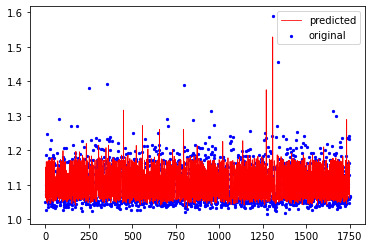

In [ ]:
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Pred

In [ ]:
perd_test = df_test.drop(["title","publish_date", "session", "tags"], axis = 1)

In [ ]:
perd_test = xgbr.predict(perd_test)

In [ ]:
perd_test

array([1.1452501, 1.0611609, 1.0622561, ..., 1.0596371, 1.1680439,
       1.148212 ], dtype=float32)

In [ ]:
submit['depth'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['depth'] = submit['depth'].round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,views,depth
document_id,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,20762,1.145
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,7756,1.061
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,6659,1.062


In [ ]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw to 6236f9129a79477b0ef18ae0ewByZQ1FQBK2dpXyY77rYw
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   3000 non-null   int64  
 1   depth   3000 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 58.6+ KB


# модель full_reads_percent

In [ ]:
X = df_train.drop(["views","depth","full_reads_percent","title","publish_date", "session", "tags"], axis = 1)
y = df_train[["full_reads_percent"]]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=870)

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(verbosity=0)


In [ ]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(verbosity=0)

Training score:  0.4061842883136412
Mean cross-validation score: 0.36
K-fold CV average score: 0.36
MSE: 120.89
RMSE: 10.99


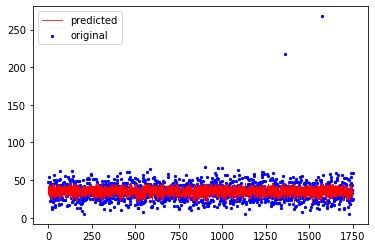

In [ ]:
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# Pred

In [ ]:
perd_test = df_test.drop(["title","publish_date", "session", "tags"], axis = 1)

In [ ]:
perd_test = xgbr.predict(perd_test)

In [ ]:
perd_test

array([36.669365, 32.13697 , 32.949856, ..., 39.545795, 40.893806,
       43.091908], dtype=float32)

In [ ]:
submit['full_reads_percent'] = perd_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit['full_reads_percent'] = submit['full_reads_percent'].round(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit.head(3)

,views,depth,full_reads_percent
document_id,,,
61f9569a9a794794245a82abJ0AvX96vTAaQCiWVbzoMdw,20762,1.145,36.668999
628c22b89a79470e553f594bQS5CqzXYRnmDdR2LaSreEw,7756,1.061,32.137001
627cb3249a7947ebdd752865XVsoyrUOT8OJJg2_finJhw,6659,1.062,32.950001


In [ ]:
submit.to_csv('submit_RBK.csv',  index=True)